In [ ]:
import pandas as pd
import os
import numpy as np
import turicreate
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [ ]:
#reading order_products_train.csv file which contains Data curated on the products added to cart and their order
order_products_train_df = pd.read_csv("order_products__train.csv")
order_products_prior_df = pd.read_csv("order_products__prior.csv")

# reading orders.csv which provides information on when and after how long an order was placed by user
orders_df = pd.read_csv("orders.csv")

#reading order_products_train.csv file which categorises each data based on department and Aisle
products_df = pd.read_csv("products.csv")

# reading aisles.csv that provides information on product names across the Aisles
aisles_df = pd.read_csv("aisles.csv")

#reading order_products_train.csv file which provides information for 21 different departments
departments_df = pd.read_csv("departments.csv")

In [ ]:
# Checking the number of rows in each dataframe 
print(len(order_products_train_df))
print(len(order_products_prior_df))
print(len(orders_df))
print(len(products_df))
print(len(aisles_df))
print(len(departments_df))

1384617
32434489
3421083
49688
134
21


In [ ]:
# Getting the number of unique users
len(orders_df.user_id.unique())

206209

In [ ]:
order_products_train_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [ ]:
order_products_prior_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [ ]:
orders_df.head(10)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0
6,550135,1,prior,7,1,9,20.0
7,3108588,1,prior,8,1,14,14.0
8,2295261,1,prior,9,1,16,0.0
9,2550362,1,prior,10,4,8,30.0


In [ ]:
products_df.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [ ]:
aisles_df.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [ ]:
departments_df.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [ ]:
len(orders_df.order_id.unique())

3421083

In [ ]:
# Checking the unique rows in each eval set
orders_df.groupby("eval_set")['user_id'].nunique()

eval_set
prior    206209
test      75000
train    131209
Name: user_id, dtype: int64

<AxesSubplot:xlabel='order_dow'>

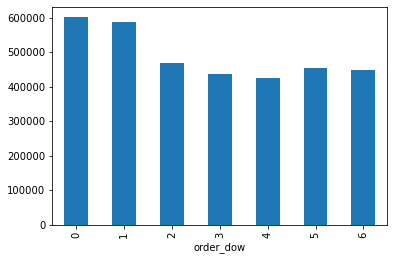

In [ ]:
# Checking the order trend in each day of the week
orders_df.groupby('order_dow')['order_id'].nunique().plot(kind = 'bar')

<AxesSubplot:xlabel='order_hour_of_day'>

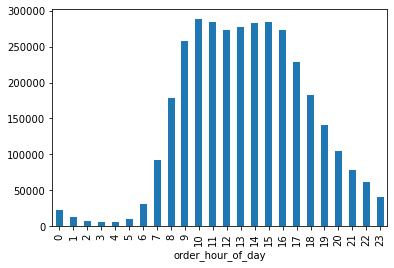

In [ ]:
# Barplot to check trend of orders in each day of the week
orders_df.groupby('order_hour_of_day')['order_id'].nunique().plot(kind = 'bar')

<AxesSubplot:xlabel='days_since_prior_order'>

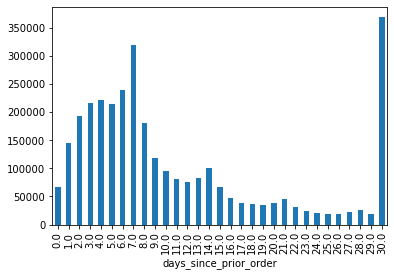

In [ ]:
# Trend in days since prior order and frequncy
orders_df.groupby('days_since_prior_order')['order_id'].nunique().plot(kind = 'bar')

In [ ]:
# Merging orders and order_products_prior_df dataframes on products_df, aisles_df, departments_df
order_products_prior_df = pd.merge(order_products_prior_df, products_df, on='product_id', how='left')
order_products_prior_df = pd.merge(order_products_prior_df, aisles_df, on='aisle_id', how='left')
order_products_prior_df = pd.merge(order_products_prior_df, departments_df, on='department_id', how='left')
order_products_prior_df.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry


<AxesSubplot:>

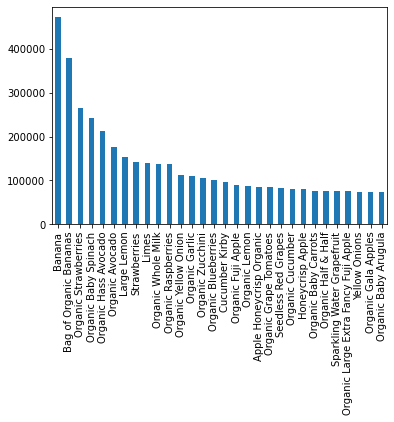

In [ ]:
# Grouping to check the highest selling products 
order_products_prior_df['product_name'].value_counts().head(30).plot(kind = 'bar')

In [ ]:
order_products_prior_df.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,202279,prior,3,5,9,8.0
1,2,28985,2,1,202279,prior,3,5,9,8.0
2,2,9327,3,0,202279,prior,3,5,9,8.0
3,2,45918,4,1,202279,prior,3,5,9,8.0
4,2,30035,5,0,202279,prior,3,5,9,8.0


### Clustering

In [ ]:
# Concating dataframes
data_merged = pd.concat([order_products_train_df, order_products_prior_df])
data_merged = pd.merge(data_merged, products_df, on='product_id', how='left')
data_merged = pd.merge(data_merged, aisles_df, on='aisle_id', how='left')
data_merged = pd.merge(data_merged, departments_df, on='department_id', how='left')
data_merged.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,1,49302,1,1,Bulgarian Yogurt,120,16,yogurt,dairy eggs
1,1,11109,2,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,other creams cheeses,dairy eggs
2,1,10246,3,0,Organic Celery Hearts,83,4,fresh vegetables,produce
3,1,49683,4,0,Cucumber Kirby,83,4,fresh vegetables,produce
4,1,43633,5,1,Lightly Smoked Sardines in Olive Oil,95,15,canned meat seafood,canned goods


In [ ]:
# Merging merged dataframe with orders_df 
data_merged = pd.merge(data_merged, orders_df[['order_id','user_id']], on='order_id', how='left')
data_merged.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id
0,1,49302,1,1,Bulgarian Yogurt,120,16,yogurt,dairy eggs,112108
1,1,11109,2,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,other creams cheeses,dairy eggs,112108
2,1,10246,3,0,Organic Celery Hearts,83,4,fresh vegetables,produce,112108
3,1,49683,4,0,Cucumber Kirby,83,4,fresh vegetables,produce,112108
4,1,43633,5,1,Lightly Smoked Sardines in Olive Oil,95,15,canned meat seafood,canned goods,112108


In [ ]:
# Getting the data which come under top 80% of the ordered departments only
top80_orders = data_merged['department'].value_counts(normalize=True)
cols_top80 = list(top80_orders[(top80_orders * 100).cumsum() < 80].index)

In [ ]:
# Making a sparse matrix representing users as rows and deartments as columns
cluster_data = data_merged.reset_index().pivot_table(index='user_id', columns='department', values = 'order_id', aggfunc='count')[cols_top80]

In [ ]:
cluster_data.fillna(0, inplace = True)

2
3
4
5
6
7
8
9


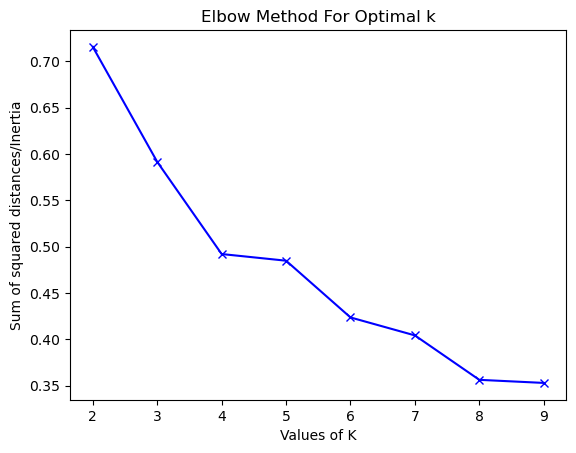

In [ ]:
Sum_of_squared_distances = []
silhouette = []

# Applying KMeans clustering for each K value in 2-10
K = range(2,10)
for num_clusters in K :
  print(num_clusters)
  kmeans = KMeans(n_clusters=num_clusters)
  kmeans.fit(cluster_data)
  #Sum_of_squared_distances.append(kmeans.inertia_)
  silhouette.append(silhouette_score(cluster_data, kmeans.labels_, metric='euclidean'))

plt.plot(K, silhouette,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
# Fitting KMeans to most optimal k value
kmeans = KMeans(n_clusters=4)
kmeans.fit(cluster_data)

KMeans(n_clusters=4)

In [ ]:
cluster_data.head()

department,produce,dairy eggs,snacks,beverages,frozen,pantry,bakery
user_id,,,,,,,
1,5.0,17.0,25.0,15.0,0.0,1.0,0.0
2,43.0,49.0,47.0,9.0,28.0,11.0,2.0
3,38.0,21.0,9.0,3.0,6.0,4.0,0.0
4,2.0,0.0,1.0,3.0,3.0,0.0,2.0
5,23.0,9.0,1.0,0.0,2.0,3.0,0.0


In [ ]:
# Getting the labels out of the clusters to interpret them
cluster_data['labels'] = kmeans.labels_

In [ ]:
# Next applying PCA as data is in higher dimention 
pca = PCA(n_components=2)
pca.fit(cluster_data)
# pca_samples = pca.transform(cluster_data)
pca_samples = pd.DataFrame(pca.fit_transform(cluster_data),columns=['PC1','PC2']) 
pca_samples['cluster'] = pd.Categorical(kmeans.labels_)

centers = kmeans.cluster_centers_

In [ ]:
cluster_data

department,produce,dairy eggs,snacks,beverages,frozen,pantry,bakery
user_id,,,,,,,
1,5.0,17.0,25.0,15.0,0.0,1.0,0.0
2,43.0,49.0,47.0,9.0,28.0,11.0,2.0
3,38.0,21.0,9.0,3.0,6.0,4.0,0.0
4,2.0,0.0,1.0,3.0,3.0,0.0,2.0
5,23.0,9.0,1.0,0.0,2.0,3.0,0.0
...,...,...,...,...,...,...,...
206205,14.0,20.0,0.0,1.0,3.0,1.0,2.0
206206,34.0,39.0,42.0,33.0,76.0,14.0,2.0
206207,50.0,52.0,23.0,20.0,21.0,15.0,3.0


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

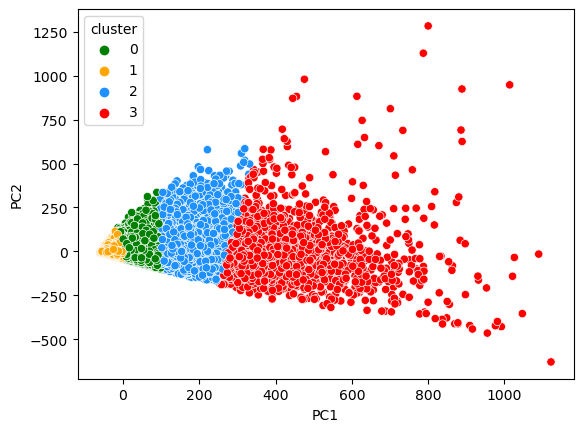

In [ ]:
import seaborn as sns
# Plotting clusters over principal component 1 and 2
sns.scatterplot(x="PC1",y="PC2",hue="cluster",data=pca_samples,
               palette=['green','orange','dodgerblue','red'])

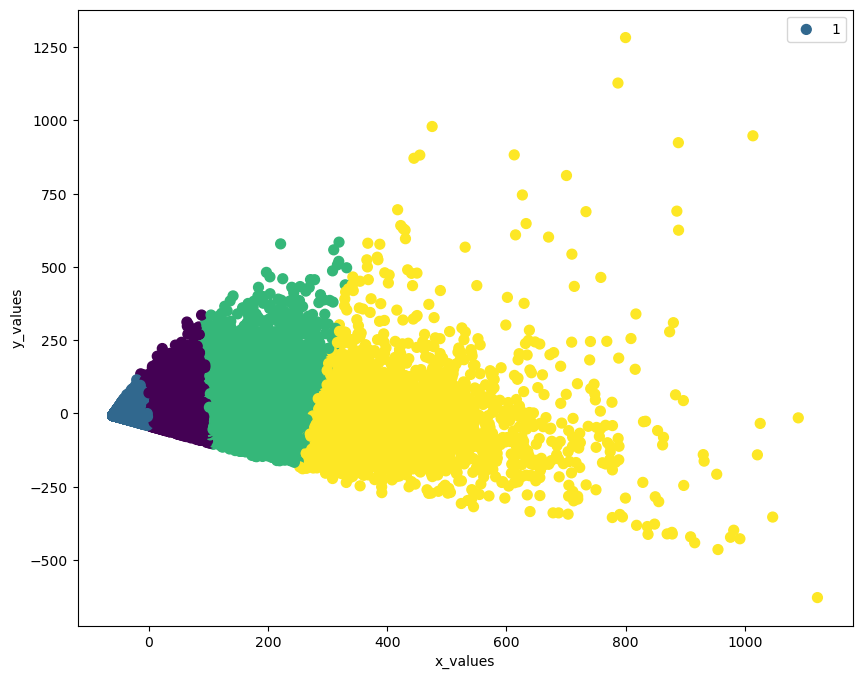

In [ ]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

# Scatter plot for thr pca values 
scatter = ax.scatter(pca_samples[:,0], pca_samples[:,1], c=kmeans.labels_, s=50)

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend(kmeans.labels_)
plt.show()

In [ ]:
cluster_data.reset_index()[['labels','user_id']].groupby('labels').count()

department,user_id
labels,
0,42787
1,144776
2,14677
3,3969


In [ ]:
# Getting the frequency count of each cluster for each department (top 8)
cluster_data.groupby('labels').sum().reset_index(drop=True)

department,produce,dairy eggs,snacks,beverages,frozen,pantry,bakery
0,3243825.0,1855679.0,983735.0,925598.0,793061.0,644167.0,400551.0
1,2417849.0,1581155.0,981239.0,1049672.0,825416.0,656422.0,384419.0
2,2684175.0,1480991.0,721088.0,599388.0,506226.0,448107.0,299252.0
3,1542529.0,713242.0,320350.0,229517.0,212155.0,208123.0,140959.0


In [ ]:
# Saving the data to csv
cluster_data.groupby('labels').sum().to_csv('clustering_1.csv')

In [ ]:
# Setting up new columns based on day of week
orders_df.loc[orders_df['order_dow'].isin([0,1]), 'Weekday_Tag'] = 'Weekend'
orders_df.loc[orders_df['order_dow'].isin([2,3,4,5,6]), 'Weekday_Tag'] = 'Weekday'

# Adding a new column, Hour_tag containing categorical values based on integer values
orders_df.loc[orders_df['order_hour_of_day'].isin([5,6,7,8,9,10,11]), 'Hour_Tag'] = 'Morning'
orders_df.loc[orders_df['order_hour_of_day'].isin([12,13,14,15,16,17]), 'Hour_Tag'] = 'Lunch'
orders_df.loc[orders_df['order_hour_of_day'].isin([18,19,20,21,22,23]), 'Hour_Tag'] = 'Dinner'
orders_df.loc[orders_df['order_hour_of_day'].isin([24,0,1,2,3,4]), 'Hour_Tag'] = 'Late_Night'

In [ ]:
orders_df['Concat_Tag'] =  orders_df[['Weekday_Tag', 'Hour_Tag']].agg('_'.join, axis=1)

In [ ]:
# Making another cluster based on the new encoded dataframe
cluster_2 = orders_df.reset_index().pivot_table(index='user_id', columns=['Concat_Tag'], 
                                                values = 'order_id', aggfunc='count')

In [ ]:
cluster_2.fillna(0, inplace=True)

2
3
4
5
6
7
8
9


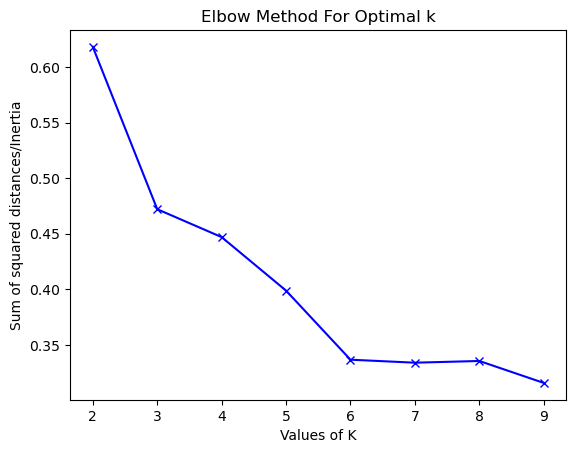

In [ ]:
Sum_of_squared_distances = []
silhouette = []

# Again using KMeans to get optimal K value
K = range(2,10)
for num_clusters in K :
  print(num_clusters)
  kmeans = KMeans(n_clusters=num_clusters)
  kmeans.fit(cluster_2)
  #Sum_of_squared_distances.append(kmeans.inertia_)
  silhouette.append(silhouette_score(cluster_2, kmeans.labels_, metric='euclidean'))

plt.plot(K, silhouette,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
# Fitting cluster and checking the labels
kmeans_2 = KMeans(n_clusters=6)
kmeans_2.fit(cluster_2)

cluster_2['labels'] = kmeans_2.labels_
cluster_2.groupby('labels').sum()

Concat_Tag,Weekday_Dinner,Weekday_Late_Night,Weekday_Lunch,Weekday_Morning,Weekend_Dinner,Weekend_Late_Night,Weekend_Lunch,Weekend_Morning
labels,,,,,,,,
0,32514.0,2991.0,93510.0,159382.0,17493.0,1500.0,52730.0,93101.0
1,132796.0,14021.0,269510.0,202127.0,70284.0,6942.0,179632.0,120485.0
2,27146.0,1944.0,116722.0,49944.0,11092.0,913.0,43955.0,21957.0
3,16832.0,1375.0,60757.0,104753.0,8198.0,588.0,23192.0,37939.0
4,86467.0,6158.0,208477.0,93711.0,36203.0,2857.0,104924.0,50939.0
5,114621.0,9522.0,298352.0,129068.0,53747.0,4885.0,167108.0,77719.0


/home/jain.ka/.conda/envs/custom/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: 
The palette list has fewer values (4) than needed (6) and will cycle, which may produce an uninterpretable plot.
  


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

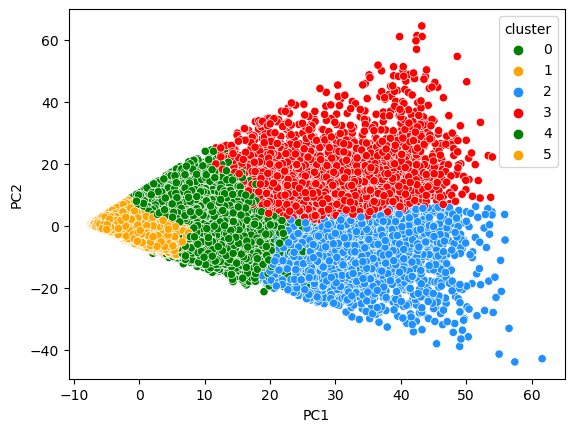

In [ ]:
# Using PCA to visualise the data
pca = PCA(n_components=2)
pca.fit(cluster_2)
# pca_samples = pca.transform(cluster_data)
pca_samples_2 = pd.DataFrame(pca.fit_transform(cluster_2),columns=['PC1','PC2']) 
pca_samples_2['cluster'] = pd.Categorical(kmeans_2.labels_)

sns.scatterplot(x="PC1",y="PC2",hue="cluster",data=pca_samples_2,
               palette=['green','orange','dodgerblue','red'])

In [ ]:
cluster_2.head()

Concat_Tag,Weekday_Dinner,Weekday_Late_Night,Weekday_Lunch,Weekday_Morning,Weekend_Dinner,Weekend_Late_Night,Weekend_Lunch,Weekend_Morning,labels
user_id,,,,,,,,,
1,0.0,0.0,2.0,6.0,0.0,0.0,2.0,1.0,0
2,0.0,0.0,1.0,8.0,0.0,0.0,1.0,5.0,4
3,2.0,0.0,3.0,0.0,1.0,0.0,7.0,0.0,0
4,0.0,0.0,4.0,2.0,0.0,0.0,0.0,0.0,0
5,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0


In [ ]:
cluster_2.reset_index().groupby('labels').sum().to_csv('clustering.csv')

### Recommendation Code

In [ ]:
order_products_prior_df.fillna(0,inplace=True)
order_products_train_df.fillna(0,inplace=True)
orders_df.fillna(0,inplace=True)

In [ ]:
data_merged = pd.concat([order_products_train_df, order_products_prior_df])
orders = orders_df[['order_id','user_id']]

data_merged = pd.merge(data_merged, orders, on='order_id').drop('order_id',axis=1)

In [ ]:
data_merged = data_merged.join(pd.DataFrame({'BoughtFlag': [1]*len(data_merged)}))

In [ ]:
total_bought = data_merged.groupby(['user_id','product_id']).BoughtFlag.sum()
data_merged = pd.merge(data_merged,total_bought, on=['user_id','product_id'], how='left')

In [ ]:
data_merged = data_merged[data_merged.BoughtFlag_y>0]
data_merged['target'] = data_merged['BoughtFlag_y']
data_merged.drop(['BoughtFlag_x','BoughtFlag_y','add_to_cart_order'],axis=1,inplace=True)

In [ ]:
data_merged.drop_duplicates(inplace=True)

In [ ]:
relation = data_merged[['user_id','product_id']].copy()
relation.drop_duplicates(inplace=True)

test = orders_df[orders_df.eval_set=='test']
test = test[['user_id']]
test_data = turicreate.SFrame(test)
relation_data = turicreate.SFrame(relation)

In [ ]:
train_data = turicreate.SFrame(data_merged)
test_data = turicreate.SFrame(test)
relation_data = turicreate.SFrame(relation)

In [ ]:
recommender =  turicreate.recommender.item_similarity_recommender.create(train_data, user_id='user_id', item_id='product_id', target='target', similarity_type='cosine', verbose=True)

Warning: Ignoring columns reordered;

To use these columns in scoring predictions, use a model that allows the use of additional features.

Preparing data set.

Data has 19428226 observations with 206209 users and 49685 items.

Data prepared in: 25.6631s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 2.927ms                        | 0.25       |

| 255.684ms                      | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in 2 passes using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 5.07s                               | 0                | 0               |

| 8.07s                               | 14.5             | 7228            |

| 11.07s                              | 28.25            | 14128           |

| 14.07s                              | 42               | 20921           |

| 22.72s                              | 49.75            | 24840           |

| 23.96s                              | 100              | 49685           |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 27.717s

In [ ]:
item_sim_result = recommender.recommend(users=test_data, items=relation_data, exclude_known=False, k=len(products_df)).to_dataframe()

recommendations finished on 1000/75000 queries. users per second: 12470.7

recommendations finished on 2000/75000 queries. users per second: 14336.2

recommendations finished on 3000/75000 queries. users per second: 15472.8

recommendations finished on 4000/75000 queries. users per second: 15984

recommendations finished on 5000/75000 queries. users per second: 16709.7

recommendations finished on 6000/75000 queries. users per second: 16808.8

recommendations finished on 7000/75000 queries. users per second: 16899

recommendations finished on 8000/75000 queries. users per second: 17081.5

recommendations finished on 9000/75000 queries. users per second: 17298.8

recommendations finished on 10000/75000 queries. users per second: 17441

recommendations finished on 11000/75000 queries. users per second: 17338.7

recommendations finished on 12000/75000 queries. users per second: 17400.4

recommendations finished on 13000/75000 queries. users per second: 17400.1

recommendations finished on 14000/75000 queries. users per second: 17538.5

recommendations finished on 15000/75000 queries. users per second: 17812.1

recommendations finished on 16000/75000 queries. users per second: 18112.6

recommendations finished on 17000/75000 queries. users per second: 18281.6

recommendations finished on 18000/75000 queries. users per second: 18373.7

recommendations finished on 19000/75000 queries. users per second: 18599.7

recommendations finished on 20000/75000 queries. users per second: 18660.9

recommendations finished on 21000/75000 queries. users per second: 18829.3

recommendations finished on 22000/75000 queries. users per second: 19012.9

recommendations finished on 23000/75000 queries. users per second: 19153.3

recommendations finished on 24000/75000 queries. users per second: 19298.3

recommendations finished on 25000/75000 queries. users per second: 19446.9

recommendations finished on 26000/75000 queries. users per second: 19424.6

recommendations finished on 27000/75000 queries. users per second: 19446.3

recommendations finished on 28000/75000 queries. users per second: 19361.6

recommendations finished on 29000/75000 queries. users per second: 19317.1

recommendations finished on 30000/75000 queries. users per second: 19432.7

recommendations finished on 31000/75000 queries. users per second: 19544.7

recommendations finished on 32000/75000 queries. users per second: 19582.3

recommendations finished on 33000/75000 queries. users per second: 19721.8

recommendations finished on 34000/75000 queries. users per second: 19627.2

recommendations finished on 35000/75000 queries. users per second: 19704

recommendations finished on 36000/75000 queries. users per second: 19785.9

recommendations finished on 37000/75000 queries. users per second: 19825.1

recommendations finished on 38000/75000 queries. users per second: 19854.4

recommendations finished on 39000/75000 queries. users per second: 19827.7

recommendations finished on 40000/75000 queries. users per second: 19822.5

recommendations finished on 41000/75000 queries. users per second: 19792.3

recommendations finished on 42000/75000 queries. users per second: 19863.3

recommendations finished on 43000/75000 queries. users per second: 19837.2

recommendations finished on 44000/75000 queries. users per second: 19856.5

recommendations finished on 45000/75000 queries. users per second: 19876.6

recommendations finished on 46000/75000 queries. users per second: 19917.5

recommendations finished on 47000/75000 queries. users per second: 19840.2

recommendations finished on 48000/75000 queries. users per second: 19890.6

recommendations finished on 49000/75000 queries. users per second: 19798.3

recommendations finished on 50000/75000 queries. users per second: 19736.9

recommendations finished on 51000/75000 queries. users per second: 19764.9

recommendations finished on 52000/75000 queries. users per second: 19833.4

recommendations finished on 53000/75000 queries. users per second: 19890.5

recommendations finished on 54000/75000 queries. users per second: 19962.1

recommendations finished on 55000/75000 queries. users per second: 19962.3

recommendations finished on 56000/75000 queries. users per second: 19922.4

recommendations finished on 57000/75000 queries. users per second: 19912

recommendations finished on 58000/75000 queries. users per second: 19947.4

recommendations finished on 59000/75000 queries. users per second: 19959

recommendations finished on 60000/75000 queries. users per second: 19991.2

recommendations finished on 61000/75000 queries. users per second: 20027.8

recommendations finished on 62000/75000 queries. users per second: 20030.3

recommendations finished on 63000/75000 queries. users per second: 20055.9

recommendations finished on 64000/75000 queries. users per second: 20057.9

recommendations finished on 65000/75000 queries. users per second: 19840.9

recommendations finished on 66000/75000 queries. users per second: 19830.6

recommendations finished on 67000/75000 queries. users per second: 19759.1

recommendations finished on 68000/75000 queries. users per second: 19748.9

recommendations finished on 69000/75000 queries. users per second: 19743

recommendations finished on 70000/75000 queries. users per second: 19744.7

recommendations finished on 71000/75000 queries. users per second: 19757.6

recommendations finished on 72000/75000 queries. users per second: 19758.1

recommendations finished on 73000/75000 queries. users per second: 19819.4

recommendations finished on 74000/75000 queries. users per second: 19846.9

recommendations finished on 75000/75000 queries. users per second: 19863.7

In [ ]:
def write_csv(results, orders_df, csv_name):
    results = pd.merge(results,orders_df[orders_df.eval_set=='test'][['user_id', 'order_id']], on=['user_id'], how='left')
    thresholds = {
        'no': results.score.min()-1,
        'std' : results.score.std(),
        'zero' : 0,
        'q05' : results.score.quantile(q=0.05),
        'q10' : results.score.quantile(q=0.1)
        }

    results_dict = {}
    for key,item in thresholds.items():
        results_dict[key] = results[results['score'] > item]
        results_dict[key] = results_dict[key].groupby('order_id')['product_id'].apply(list).reset_index(name='products')
        results_dict[key]['products'] = results_dict[key].apply(clean_prediction, axis=1)

    for key,item in thresholds.items():
        if len(results_dict[key]) == 75000:
            results_dict[key].to_csv('submission_turi_'+csv_name+'_pol'+str(key)+'.csv',index=False)

In [ ]:
def clean_prediction(row):
    data = row.products
    data = str("".join(str(data))[1:-1].replace(',',' '))
    return data

In [ ]:
write_csv(item_sim_result, orders_df, 'item_sim')

In [ ]:
f_model = turicreate.factorization_recommender.create(train_data, user_id='user_id', 
max_iterations=50, item_id='product_id', target='target', verbose=True)

Preparing data set.

Data has 19428226 observations with 206209 users and 49685 items.

Data prepared in: 22.404s

Training factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 8        |

| regularization                 | L2 Regularization on Factors                     | 1e-08    |

| solver                         | Solver used for training                         | adagrad  |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-10    |

| max_iterations                 | Maximum Number of Iterations                     | 50       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 2428528 / 19428226 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 16.6667           | Not Viable                               |

| 1       | 4.16667           | Not Viable                               |

| 2       | 1.04167           | 6.09133                                  |

| 3       | 0.520833          | 6.48598                                  |

| 4       | 0.260417          | 9.88838                                  |

| 5       | 0.130208          | 12.1629                                  |

+---------+-------------------+------------------------------------------+

| Final   | 1.04167           | 6.09133                                  |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 95us         | 16.7061           | 4.08731               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 8.80s        | 13.5632           | 3.68039               | 1.04167     |

| 2       | 17.69s       | 11.6473           | 3.41081               | 1.04167     |

| 3       | 26.60s       | 10.8189           | 3.28739               | 1.04167     |

| 4       | 35.64s       | 10.1865           | 3.18983               | 1.04167     |

| 5       | 45.11s       | 9.83273           | 3.1339                | 1.04167     |

| 7       | 1m 2s        | 9.60322           | 3.09707               | 1.04167     |

| 8       | 1m 11s       | 9.51756           | 3.0832                | 1.04167     |

| 9       | 1m 20s       | 9.39042           | 3.06251               | 1.04167     |

| 10      | 1m 29s       | 9.29033           | 3.04611               | 1.04167     |

| 11      | 1m 38s       | 9.2278            | 3.03582               | 1.04167     |

| 12      | 1m 47s       | 9.15071           | 3.02308               | 1.04167     |

| 13      | 1m 56s       | 9.11058           | 3.01642               | 1.04167     |

| 14      | 2m 5s        | 9.0466            | 3.00578               | 1.04167     |

| 15      | 2m 14s       | 9.0124            | 3.00007               | 1.04167     |

| 16      | 2m 23s       | 8.99491           | 2.99714               | 1.04167     |

| 17      | 2m 32s       | 8.95418           | 2.99033               | 1.04167     |

| 18      | 2m 41s       | 8.90856           | 2.98267               | 1.04167     |

| 19      | 2m 50s       | 8.88811           | 2.97923               | 1.04167     |

| 20      | 2m 59s       | 8.86268           | 2.97495               | 1.04167     |

| 21      | 3m 7s        | 8.82754           | 2.96902               | 1.04167     |

| 22      | 3m 16s       | 8.82833           | 2.96915               | 1.04167     |

| 23      | 3m 25s       | 8.79095           | 2.96283               | 1.04167     |

| 24      | 3m 34s       | 8.76753           | 2.95887               | 1.04167     |

| 25      | 3m 43s       | 8.76415           | 2.95829               | 1.04167     |

| 26      | 3m 52s       | 8.7487            | 2.95566               | 1.04167     |

| 27      | 4m 1s        | 8.74208           | 2.95453               | 1.04167     |

| 28      | 4m 10s       | 8.71225           | 2.94947               | 1.04167     |

| 29      | 4m 18s       | 8.72033           | 2.95084               | 1.04167     |

| 30      | 4m 28s       | 8.69391           | 2.94635               | 1.04167     |

| 31      | 4m 37s       | 8.69087           | 2.94582               | 1.04167     |

| 32      | 4m 46s       | 8.68242           | 2.94438               | 1.04167     |

| 33      | 4m 55s       | 8.67278           | 2.94274               | 1.04167     |

| 34      | 5m 4s        | 8.67811           | 2.94364               | 1.04167     |

| 35      | 5m 13s       | 8.67195           | 2.94258               | 1.04167     |

| 36      | 5m 22s       | 8.67385           | 2.9429                | 1.04167     |

| 37      | 5m 31s       | 8.67236           | 2.94264               | 1.04167     |

| 38      | 5m 40s       | 8.64697           | 2.93832               | 1.04167     |

| 39      | 5m 49s       | 8.65966           | 2.94047               | 1.04167     |

| 40      | 5m 57s       | 8.62974           | 2.93538               | 1.04167     |

| 41      | 6m 6s        | 8.62484           | 2.93453               | 1.04167     |

| 42      | 6m 15s       | 8.62805           | 2.93508               | 1.04167     |

| 43      | 6m 24s       | 8.59375           | 2.92922               | 1.04167     |

| 44      | 6m 33s       | 8.60855           | 2.93174               | 1.04167     |

| 45      | 6m 42s       | 8.61833           | 2.9334                | 1.04167     |

| 46      | 6m 50s       | 8.61788           | 2.93332               | 1.04167     |

| 47      | 6m 59s       | 8.62129           | 2.9339                | 1.04167     |

| 48      | 7m 8s        | 8.61898           | 2.9335                | 1.04167     |

| 49      | 7m 18s       | 8.63842           | 2.93681               | 1.04167     |

| 50      | 7m 27s       | 8.65525           | 2.93967               | 1.04167     |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 8.43951

Final training RMSE: 2.90275

In [ ]:
f_results = f_model.recommend(users=test_data, items=relation_data, exclude_known=False, k=len(products_df)).to_dataframe()

recommendations finished on 1000/75000 queries. users per second: 14404.2

recommendations finished on 2000/75000 queries. users per second: 18891.3

recommendations finished on 3000/75000 queries. users per second: 20741.3

recommendations finished on 4000/75000 queries. users per second: 22304.7

recommendations finished on 5000/75000 queries. users per second: 22828.8

recommendations finished on 6000/75000 queries. users per second: 23532.9

recommendations finished on 7000/75000 queries. users per second: 23647.5

recommendations finished on 8000/75000 queries. users per second: 23213.6

recommendations finished on 9000/75000 queries. users per second: 22696.5

recommendations finished on 10000/75000 queries. users per second: 23278.5

recommendations finished on 11000/75000 queries. users per second: 23662.9

recommendations finished on 12000/75000 queries. users per second: 23892.6

recommendations finished on 13000/75000 queries. users per second: 24053.8

recommendations finished on 14000/75000 queries. users per second: 23854.3

recommendations finished on 15000/75000 queries. users per second: 23861.7

recommendations finished on 16000/75000 queries. users per second: 24030.2

recommendations finished on 17000/75000 queries. users per second: 23903.2

recommendations finished on 18000/75000 queries. users per second: 24135.7

recommendations finished on 19000/75000 queries. users per second: 23781.8

recommendations finished on 20000/75000 queries. users per second: 23753.3

recommendations finished on 21000/75000 queries. users per second: 23658.1

recommendations finished on 22000/75000 queries. users per second: 23740.2

recommendations finished on 23000/75000 queries. users per second: 23802.5

recommendations finished on 24000/75000 queries. users per second: 23663.2

recommendations finished on 25000/75000 queries. users per second: 23836.3

recommendations finished on 26000/75000 queries. users per second: 23645.1

recommendations finished on 27000/75000 queries. users per second: 23555.9

recommendations finished on 28000/75000 queries. users per second: 23470

recommendations finished on 29000/75000 queries. users per second: 23602.2

recommendations finished on 30000/75000 queries. users per second: 23501.6

recommendations finished on 31000/75000 queries. users per second: 23496.8

recommendations finished on 32000/75000 queries. users per second: 23317.2

recommendations finished on 33000/75000 queries. users per second: 23448.8

recommendations finished on 34000/75000 queries. users per second: 23545.3

recommendations finished on 35000/75000 queries. users per second: 23640.1

recommendations finished on 36000/75000 queries. users per second: 23734.1

recommendations finished on 37000/75000 queries. users per second: 23791.6

recommendations finished on 38000/75000 queries. users per second: 23868.5

recommendations finished on 39000/75000 queries. users per second: 23858

recommendations finished on 40000/75000 queries. users per second: 23941.3

recommendations finished on 41000/75000 queries. users per second: 23950.4

recommendations finished on 42000/75000 queries. users per second: 23983.5

recommendations finished on 43000/75000 queries. users per second: 24017

recommendations finished on 44000/75000 queries. users per second: 24099.4

recommendations finished on 45000/75000 queries. users per second: 24174.2

recommendations finished on 46000/75000 queries. users per second: 24258.9

recommendations finished on 47000/75000 queries. users per second: 24341.6

recommendations finished on 48000/75000 queries. users per second: 24177.1

recommendations finished on 49000/75000 queries. users per second: 24200.4

recommendations finished on 50000/75000 queries. users per second: 24270

recommendations finished on 51000/75000 queries. users per second: 24387.8

recommendations finished on 52000/75000 queries. users per second: 24420.5

recommendations finished on 53000/75000 queries. users per second: 24330.3

recommendations finished on 54000/75000 queries. users per second: 24267.6

recommendations finished on 55000/75000 queries. users per second: 24211.7

recommendations finished on 56000/75000 queries. users per second: 24269.9

recommendations finished on 57000/75000 queries. users per second: 24261

recommendations finished on 58000/75000 queries. users per second: 24309.7

recommendations finished on 59000/75000 queries. users per second: 24412.2

recommendations finished on 60000/75000 queries. users per second: 24465.5

recommendations finished on 61000/75000 queries. users per second: 24468

recommendations finished on 62000/75000 queries. users per second: 24510.7

recommendations finished on 63000/75000 queries. users per second: 24432.9

recommendations finished on 64000/75000 queries. users per second: 24412.4

recommendations finished on 65000/75000 queries. users per second: 24470.5

recommendations finished on 66000/75000 queries. users per second: 24511.8

recommendations finished on 67000/75000 queries. users per second: 24600.2

recommendations finished on 68000/75000 queries. users per second: 24593.2

recommendations finished on 69000/75000 queries. users per second: 24653.8

recommendations finished on 70000/75000 queries. users per second: 24626.6

recommendations finished on 71000/75000 queries. users per second: 24703.4

recommendations finished on 72000/75000 queries. users per second: 24778.5

recommendations finished on 73000/75000 queries. users per second: 24862.8

recommendations finished on 74000/75000 queries. users per second: 24998.6

recommendations finished on 75000/75000 queries. users per second: 24994.8

In [ ]:
write_csv(f_results, orders_df, 'f_results')

In [ ]:
rf_model = turicreate.ranking_factorization_recommender.create(train_data, user_id='user_id', 
max_iterations=50, item_id='product_id', target='target', verbose=True)

Preparing data set.

Data has 19428226 observations with 206209 users and 49685 items.

Data prepared in: 19.991s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 32       |

| regularization                 | L2 Regularization on Factors                     | 1e-09    |

| solver                         | Solver used for training                         | adagrad  |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-09    |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.25     |

| max_iterations                 | Maximum Number of Iterations                     | 50       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 2428528 / 19428226 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 16.6667           | Not Viable                               |

| 1       | 4.16667           | Not Viable                               |

| 2       | 1.04167           | Not Viable                               |

| 3       | 0.260417          | No Decrease (34.5172 >= 32.7302)         |

| 4       | 0.0651042         | 27.5042                                  |

| 5       | 0.0325521         | 27.8805                                  |

| 6       | 0.016276          | 28.4313                                  |

| 7       | 0.00813802        | 29.3646                                  |

+---------+-------------------+------------------------------------------+

| Final   | 0.0651042         | 27.5042                                  |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 122us        | 32.7518           | 4.08731               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 25.27s       | 25.0357           | 3.98038               | 0.0651042   |

| 2       | 50.33s       | 24.334            | 4.03844               | 0.0651042   |

| 3       | 1m 16s       | 23.7902           | 3.92795               | 0.0651042   |

| 4       | 1m 42s       | 23.2193           | 3.88897               | 0.0651042   |

| 5       | 2m 9s        | 22.8244           | 3.87067               | 0.0651042   |

| 7       | 3m 2s        | 22.2855           | 3.84224               | 0.0651042   |

| 8       | 3m 28s       | 22.0936           | 3.83018               | 0.0651042   |

| 9       | 3m 54s       | 21.9215           | 3.81905               | 0.0651042   |

| 10      | 4m 20s       | 21.7754           | 3.80902               | 0.0651042   |

| 11      | 4m 46s       | 21.646            | 3.79935               | 0.0651042   |

| 12      | 5m 13s       | 21.5313           | 3.79095               | 0.0651042   |

| 13      | 5m 39s       | 21.4223           | 3.7828                | 0.0651042   |

| 14      | 6m 6s        | 21.328            | 3.77506               | 0.0651042   |

| 15      | 6m 32s       | 21.2374           | 3.76768               | 0.0651042   |

| 16      | 6m 59s       | 21.15             | 3.76085               | 0.0651042   |

| 17      | 7m 25s       | 21.0722           | 3.75395               | 0.0651042   |

| 18      | 7m 51s       | 20.9985           | 3.74778               | 0.0651042   |

| 19      | 8m 17s       | 20.9291           | 3.74127               | 0.0651042   |

| 20      | 8m 43s       | 20.8575           | 3.73507               | 0.0651042   |

| 21      | 9m 10s       | 20.7894           | 3.72903               | 0.0651042   |

| 22      | 9m 36s       | 20.7272           | 3.72327               | 0.0651042   |

| 23      | 10m 2s       | 20.6696           | 3.71732               | 0.0651042   |

| 24      | 10m 28s      | 20.6093           | 3.7121                | 0.0651042   |

| 25      | 10m 55s      | 20.5525           | 3.70681               | 0.0651042   |

| 26      | 11m 21s      | 20.5001           | 3.70166               | 0.0651042   |

| 27      | 11m 47s      | 20.449            | 3.69685               | 0.0651042   |

| 28      | 12m 13s      | 20.4018           | 3.69215               | 0.0651042   |

| 29      | 12m 39s      | 20.3512           | 3.68766               | 0.0651042   |

| 30      | 13m 6s       | 20.3024           | 3.68306               | 0.0651042   |

| 31      | 13m 33s      | 20.2563           | 3.67845               | 0.0651042   |

| 32      | 14m 0s       | 20.2139           | 3.67416               | 0.0651042   |

| 33      | 14m 26s      | 20.1691           | 3.66991               | 0.0651042   |

| 34      | 14m 52s      | 20.1252           | 3.66555               | 0.0651042   |

| 35      | 15m 18s      | 20.0811           | 3.66134               | 0.0651042   |

| 36      | 15m 45s      | 20.0376           | 3.65682               | 0.0651042   |

| 37      | 16m 11s      | 19.9987           | 3.65306               | 0.0651042   |

| 38      | 16m 37s      | 19.9567           | 3.64865               | 0.0651042   |

| 39      | 17m 4s       | 19.9158           | 3.64478               | 0.0651042   |

| 40      | 17m 30s      | 19.8746           | 3.64051               | 0.0651042   |

| 41      | 17m 57s      | 19.8341           | 3.63673               | 0.0651042   |

| 42      | 18m 23s      | 19.7978           | 3.6328                | 0.0651042   |

| 43      | 18m 49s      | 19.7575           | 3.62877               | 0.0651042   |

| 44      | 19m 16s      | 19.7196           | 3.62527               | 0.0651042   |

| 45      | 19m 42s      | 19.6835           | 3.62146               | 0.0651042   |

| 46      | 20m 8s       | 19.6487           | 3.61753               | 0.0651042   |

| 47      | 20m 35s      | 19.6114           | 3.6141                | 0.0651042   |

| 48      | 21m 1s       | 19.5743           | 3.61016               | 0.0651042   |

| 49      | 21m 27s      | 19.5391           | 3.60688               | 0.0651042   |

| 50      | 21m 54s      | 19.5018           | 3.60329               | 0.0651042   |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 19.2825

Final training RMSE: 3.57267

In [ ]:
rf_results = rf_model.recommend(users=test_data, items=relation_data, 
                                exclude_known=False, k=len(products_df)).to_dataframe()

recommendations finished on 1000/75000 queries. users per second: 15395.7

recommendations finished on 2000/75000 queries. users per second: 18815.9

recommendations finished on 3000/75000 queries. users per second: 21429.5

recommendations finished on 4000/75000 queries. users per second: 20792.1

recommendations finished on 5000/75000 queries. users per second: 21771.1

recommendations finished on 6000/75000 queries. users per second: 22533.7

recommendations finished on 7000/75000 queries. users per second: 23176.2

recommendations finished on 8000/75000 queries. users per second: 23728.9

recommendations finished on 9000/75000 queries. users per second: 24111.9

recommendations finished on 10000/75000 queries. users per second: 24282.3

recommendations finished on 11000/75000 queries. users per second: 24300.4

recommendations finished on 12000/75000 queries. users per second: 24406.4

recommendations finished on 13000/75000 queries. users per second: 24639.8

recommendations finished on 14000/75000 queries. users per second: 24666.7

recommendations finished on 15000/75000 queries. users per second: 25001.3

recommendations finished on 16000/75000 queries. users per second: 25098.2

recommendations finished on 17000/75000 queries. users per second: 25149.2

recommendations finished on 18000/75000 queries. users per second: 25039.6

recommendations finished on 19000/75000 queries. users per second: 25133.8

recommendations finished on 20000/75000 queries. users per second: 25134.9

recommendations finished on 21000/75000 queries. users per second: 25229.2

recommendations finished on 22000/75000 queries. users per second: 25317.7

recommendations finished on 23000/75000 queries. users per second: 25551.9

recommendations finished on 24000/75000 queries. users per second: 25738.3

recommendations finished on 25000/75000 queries. users per second: 25902.4

recommendations finished on 26000/75000 queries. users per second: 25969.7

recommendations finished on 27000/75000 queries. users per second: 26019.2

recommendations finished on 28000/75000 queries. users per second: 26063.5

recommendations finished on 29000/75000 queries. users per second: 26132.5

recommendations finished on 30000/75000 queries. users per second: 26028.8

recommendations finished on 31000/75000 queries. users per second: 26049.1

recommendations finished on 32000/75000 queries. users per second: 26264.4

recommendations finished on 33000/75000 queries. users per second: 26211.2

recommendations finished on 34000/75000 queries. users per second: 26207.4

recommendations finished on 35000/75000 queries. users per second: 26297.1

recommendations finished on 36000/75000 queries. users per second: 26378.7

recommendations finished on 37000/75000 queries. users per second: 26313.4

recommendations finished on 38000/75000 queries. users per second: 26414.5

recommendations finished on 39000/75000 queries. users per second: 26439.8

recommendations finished on 40000/75000 queries. users per second: 26477.1

recommendations finished on 41000/75000 queries. users per second: 26575.8

recommendations finished on 42000/75000 queries. users per second: 26574.6

recommendations finished on 43000/75000 queries. users per second: 26543.6

recommendations finished on 44000/75000 queries. users per second: 26436.7

recommendations finished on 45000/75000 queries. users per second: 26441.7

recommendations finished on 46000/75000 queries. users per second: 26504

recommendations finished on 47000/75000 queries. users per second: 26595.8

recommendations finished on 48000/75000 queries. users per second: 26659.9

recommendations finished on 49000/75000 queries. users per second: 26603.6

recommendations finished on 50000/75000 queries. users per second: 26555.4

recommendations finished on 51000/75000 queries. users per second: 26570.6

recommendations finished on 52000/75000 queries. users per second: 26335.5

recommendations finished on 53000/75000 queries. users per second: 26292.4

recommendations finished on 54000/75000 queries. users per second: 26335

recommendations finished on 55000/75000 queries. users per second: 26262.6

recommendations finished on 56000/75000 queries. users per second: 26160

recommendations finished on 57000/75000 queries. users per second: 26268.7

recommendations finished on 58000/75000 queries. users per second: 26315.6

recommendations finished on 59000/75000 queries. users per second: 26267.8

recommendations finished on 60000/75000 queries. users per second: 26330.9

recommendations finished on 61000/75000 queries. users per second: 26374.5

recommendations finished on 62000/75000 queries. users per second: 26406.1

recommendations finished on 63000/75000 queries. users per second: 26359.7

recommendations finished on 64000/75000 queries. users per second: 26395.4

recommendations finished on 65000/75000 queries. users per second: 26450.5

recommendations finished on 66000/75000 queries. users per second: 26307.3

recommendations finished on 67000/75000 queries. users per second: 26200

recommendations finished on 68000/75000 queries. users per second: 26220.8

recommendations finished on 69000/75000 queries. users per second: 26099

recommendations finished on 70000/75000 queries. users per second: 26172.5

recommendations finished on 71000/75000 queries. users per second: 26231.5

recommendations finished on 72000/75000 queries. users per second: 26310.1

recommendations finished on 73000/75000 queries. users per second: 26354.6

recommendations finished on 74000/75000 queries. users per second: 26453.6

recommendations finished on 75000/75000 queries. users per second: 26363.3

In [ ]:
write_csv(rf_results, orders_df, 'rf_results')

In [ ]:
pr_model = turicreate.recommender.popularity_recommender.create(train_data, user_id='user_id', item_id='product_id', target='target', verbose=True)

Warning: Ignoring columns reordered;

To use these columns in scoring predictions, use a model that allows the use of additional features.

Preparing data set.

Data has 19428226 observations with 206209 users and 49685 items.

Data prepared in: 19.4237s

19428226 observations to process; with 49685 unique items.

In [ ]:
pr_results = pr_model.recommend(users=test_data, items=relation_data,exclude_known=False, k=len(products_df)).to_dataframe()

recommendations finished on 1000/75000 queries. users per second: 18071.4

recommendations finished on 2000/75000 queries. users per second: 18696.8

recommendations finished on 3000/75000 queries. users per second: 19855.8

recommendations finished on 4000/75000 queries. users per second: 21189.2

recommendations finished on 5000/75000 queries. users per second: 21900

recommendations finished on 6000/75000 queries. users per second: 21385.1

recommendations finished on 7000/75000 queries. users per second: 21635.3

recommendations finished on 8000/75000 queries. users per second: 21851.4

recommendations finished on 9000/75000 queries. users per second: 22359.4

recommendations finished on 10000/75000 queries. users per second: 22478.3

recommendations finished on 11000/75000 queries. users per second: 22389.9

recommendations finished on 12000/75000 queries. users per second: 21974.2

recommendations finished on 13000/75000 queries. users per second: 21539.7

recommendations finished on 14000/75000 queries. users per second: 21872.8

recommendations finished on 15000/75000 queries. users per second: 22316.8

recommendations finished on 16000/75000 queries. users per second: 22591.7

recommendations finished on 17000/75000 queries. users per second: 22566.5

recommendations finished on 18000/75000 queries. users per second: 22754.5

recommendations finished on 19000/75000 queries. users per second: 22863.9

recommendations finished on 20000/75000 queries. users per second: 23139.3

recommendations finished on 21000/75000 queries. users per second: 23271.1

recommendations finished on 22000/75000 queries. users per second: 23296.7

recommendations finished on 23000/75000 queries. users per second: 23578.4

recommendations finished on 24000/75000 queries. users per second: 23523

recommendations finished on 25000/75000 queries. users per second: 23785.9

recommendations finished on 26000/75000 queries. users per second: 23856.3

recommendations finished on 27000/75000 queries. users per second: 23824.1

recommendations finished on 28000/75000 queries. users per second: 23740.8

recommendations finished on 29000/75000 queries. users per second: 23706.4

recommendations finished on 30000/75000 queries. users per second: 23798.1

recommendations finished on 31000/75000 queries. users per second: 23920.8

recommendations finished on 32000/75000 queries. users per second: 24026.3

recommendations finished on 33000/75000 queries. users per second: 24082.3

recommendations finished on 34000/75000 queries. users per second: 24030.4

recommendations finished on 35000/75000 queries. users per second: 23998

recommendations finished on 36000/75000 queries. users per second: 24021.5

recommendations finished on 37000/75000 queries. users per second: 24057.6

recommendations finished on 38000/75000 queries. users per second: 24080.3

recommendations finished on 39000/75000 queries. users per second: 24193.3

recommendations finished on 40000/75000 queries. users per second: 24357.2

recommendations finished on 41000/75000 queries. users per second: 24343.9

recommendations finished on 42000/75000 queries. users per second: 24287.5

recommendations finished on 43000/75000 queries. users per second: 24324.1

recommendations finished on 44000/75000 queries. users per second: 24184.8

recommendations finished on 45000/75000 queries. users per second: 24166.9

recommendations finished on 46000/75000 queries. users per second: 24239.1

recommendations finished on 47000/75000 queries. users per second: 24328.1

recommendations finished on 48000/75000 queries. users per second: 24383.6

recommendations finished on 49000/75000 queries. users per second: 24353.3

recommendations finished on 50000/75000 queries. users per second: 24378.8

recommendations finished on 51000/75000 queries. users per second: 24411.8

recommendations finished on 52000/75000 queries. users per second: 24433.2

recommendations finished on 53000/75000 queries. users per second: 24470.3

recommendations finished on 54000/75000 queries. users per second: 24518.7

recommendations finished on 55000/75000 queries. users per second: 24508.2

recommendations finished on 56000/75000 queries. users per second: 24553.3

recommendations finished on 57000/75000 queries. users per second: 24687.3

recommendations finished on 58000/75000 queries. users per second: 24683.1

recommendations finished on 59000/75000 queries. users per second: 24561.3

recommendations finished on 60000/75000 queries. users per second: 24552.9

recommendations finished on 61000/75000 queries. users per second: 24607.6

recommendations finished on 62000/75000 queries. users per second: 24640.2

recommendations finished on 63000/75000 queries. users per second: 24654.9

recommendations finished on 64000/75000 queries. users per second: 24629.7

recommendations finished on 65000/75000 queries. users per second: 24687.2

recommendations finished on 66000/75000 queries. users per second: 24583.1

recommendations finished on 67000/75000 queries. users per second: 24611.6

recommendations finished on 68000/75000 queries. users per second: 24591

recommendations finished on 69000/75000 queries. users per second: 24682.7

recommendations finished on 70000/75000 queries. users per second: 24714

recommendations finished on 71000/75000 queries. users per second: 24732.1

recommendations finished on 72000/75000 queries. users per second: 24868.5

recommendations finished on 73000/75000 queries. users per second: 24962.8

recommendations finished on 74000/75000 queries. users per second: 25057.6

recommendations finished on 75000/75000 queries. users per second: 24976.3

In [ ]:
write_csv(pr_results, orders_df, 'pr_results')

In [ ]:
# order_products_prior_df = order_products_prior_df.append(order_products_train_df)
order_products_prior_df = pd.merge(order_products_prior_df, orders_df, on='order_id', how='left')

In [ ]:
unique_product_id = order_products_prior_df.product_id.unique()
unique_user_id = order_products_prior_df.user_id.unique()

In [ ]:
order_products_prior_df = order_products_prior_df.join(pd.DataFrame({'BoughtFlag': [1]*len(order_products_prior_df)}))